In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [5]:
dataframe = pd.read_csv('1000_Companies.csv')
dataframe.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# otra vez sin nulos

In [6]:
dataframe.isnull().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

the clue is in the name, 1000 empresas y sus gastos (primeras 3 columnas, estado donde se encuentran y ganancias)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [8]:
dataframe['State'].value_counts()

State
California    344
New York      334
Florida       322
Name: count, dtype: int64

In [9]:
dataframe.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


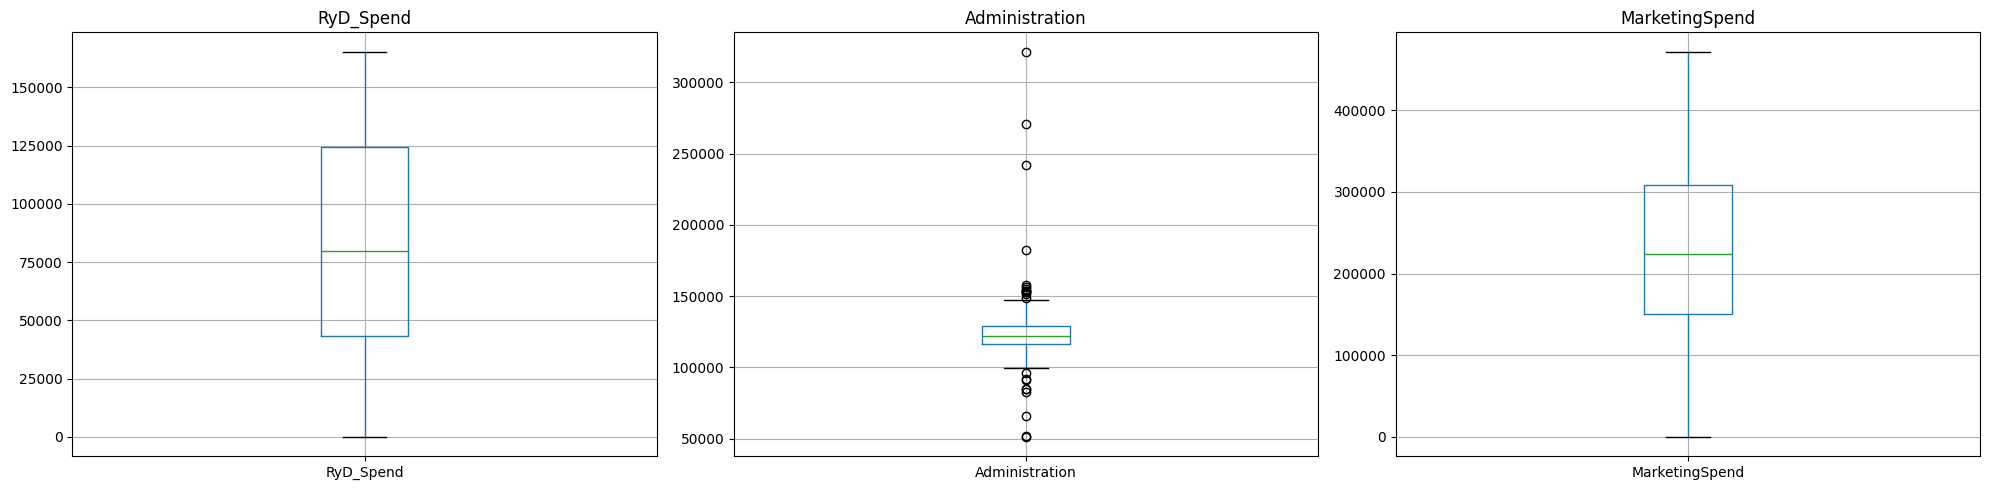

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, col in enumerate(dataframe.columns[:3]):
    dataframe.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

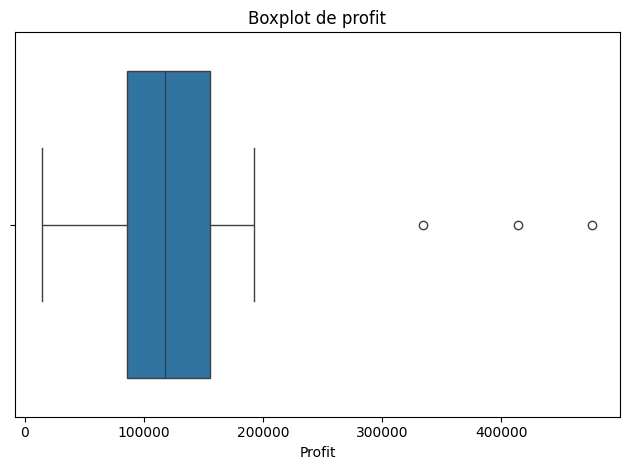

In [11]:
sns.boxplot(dataframe, x='Profit')
plt.title("Boxplot de profit")
plt.tight_layout()
plt.show()

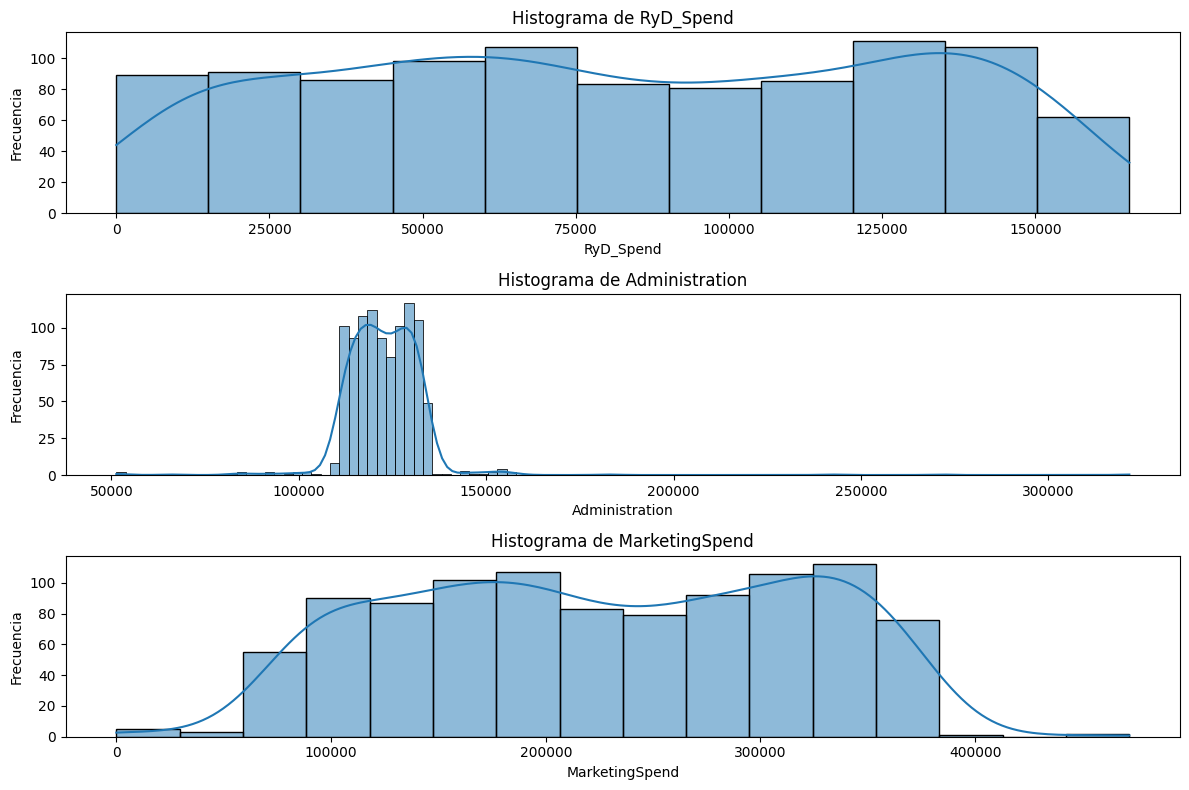

In [12]:
plt.figure(figsize=(12, 8))

for i, columna in enumerate(dataframe.columns[:3]):
    plt.subplot(3,1,i+1)
    sns.histplot(dataframe[columna], kde=True) 
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

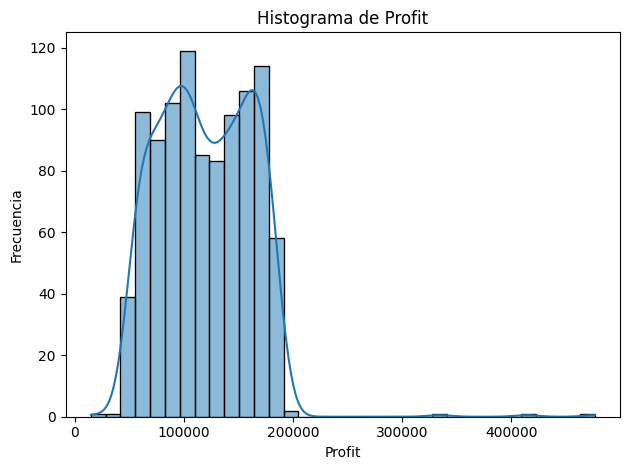

In [13]:
sns.histplot(dataframe['Profit'], kde=True)
plt.title(f'Histograma de Profit')
plt.xlabel('Profit')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

In [14]:
df_sub = dataframe[dataframe.describe().columns]

dataframe_escalado = (df_sub-df_sub.mean())/df_sub.std()

In [15]:
dataframe_escalado.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

armar x e y

In [17]:
X = dataframe_escalado[['RyD_Spend', 'Administration', 'MarketingSpend']]
Y = dataframe_escalado['Profit']

Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)
analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. Graficar el
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos
conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error
Cuadrático Medio).

In [19]:
from sklearn.model_selection import train_test_split
X_train_primero, X_test_primero, y_train_primero, y_test_primero = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_segundo, X_test_segundo, y_train_segundo, y_test_segundo = train_test_split(X, Y, test_size=0.2, random_state=84)

criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, criterion="squared_error")

In [23]:
regressor.fit(X_train_primero, y_train_primero)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [24]:
# Predict on the test set
y_pred = regressor.predict(X_test_primero)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_primero, y_pred)
r2=r2_score(y_test_primero,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R Squared {r2:.2f}")

Mean Squared Error: 0.04
R Squared 0.95
